<a href="https://colab.research.google.com/github/thinhhoUB/Data-Case-Study-Challenge---Momo-VietNam/blob/main/2022_Case_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022 Case challenge :

Users' retentention has always been one of the key targets that Momo is striving to be better. A Loyalty program called "Momo hoàn tiền" ,one of the projects aiming to achieve such goal, was launched on January 1st 2021.

We will explore some insights about this program:

In [ ]:
#some library for manipulating and visualizing data
import pandas as pd
import numpy as sns
import matplotlib.pyplot as plt
import seaborn as sns

Here, I download as **csv file** and read by pandas library

Loading all the datasets:

In [ ]:
transaction=pd.read_csv('2022 Case challenge_ DA update.xlsx - Data. Transactions.csv')
points=pd.read_csv('2022 Case challenge_ DA update.xlsx - Data. Loyalty Points.csv')
merchant=pd.read_csv('2022 Case challenge_ DA update.xlsx - Data.Merchant.csv')
benefit=pd.read_csv('2022 Case challenge_ DA update.xlsx - Data. Loyalty benefits.csv')

# Data processing

#### 1) Combined with the 'Loyalty Points' table, add a column 'Loyalty Points' in 'Transactions' table with given rules. Then create another table named 'Loyalty Ranking' which must includes columns named Rank_name and Calculated_points to calculate the Rank of each user on daily basic. At the end of Mar 2022, how many user achieved rank Gold?																	
																	

In [ ]:
points.head()

,Service Group,Point Mechanism,Maximum Point Per Trans
0,supermarket,1 points/1000VND GMV,500 points
1,data,10 points/1000VND GMV,1000 points
2,cvs,1 points/1000VND GMV,300 points
3,marketplace,1 points/1000VND GMV,500 points
4,Coffee chains and Milk tea,1 points/1000VND GMV,500 points


In [ ]:
points.dtypes

Service Group              object
Point Mechanism            object
Maximum Point Per Trans    object
dtype: object

Clean columns :`Point Mechanism` and `Maximum Point Per Trans` have to be in integer types:

In [ ]:
def transform(row):
    return row['Point Mechanism'].split(' ')[0]
    #split by space and take the number at 1st index

In [ ]:
def transform_2(row):
     return row['Maximum Point Per Trans'].split(' ')[0]

In [ ]:
points['Point Mechanism']=points.apply(transform,axis=1)
points['Maximum Point Per Trans']=points.apply(transform_2,axis=1)

In [ ]:
points = points.astype({"Point Mechanism": int, "Maximum Point Per Trans": int})
points.dtypes

Service Group              object
Point Mechanism             int64
Maximum Point Per Trans     int64
dtype: object

In [ ]:
transaction.head()

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace
1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket
2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket
3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket
4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs


In [ ]:
transaction.dtypes

DATE                    object
Order_id                 int64
NEWVERTICAL_Merchant    object
MerchantID               int64
User_id                  int64
GMV                      int64
Service Group           object
dtype: object

Change `DATE` column to **datetime** type:

In [ ]:
transaction['DATE']= pd.to_datetime(transaction['DATE'],format='%Y/%m/%d')

In [ ]:
#merging two dataframe(transaction and loyalty point) using same column Service Group
transaction=pd.merge(transaction,points,on='Service Group')
transaction.sort_values('DATE').reset_index(drop=True)
transaction.head()

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Point Mechanism,Maximum Point Per Trans
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,1,500
1,2021-01-01,8734263912,Marketplace,24,31058664,300700,marketplace,1,500
2,2021-01-01,8735101008,Marketplace,24,36415344,178900,marketplace,1,500
3,2021-01-02,8747547067,Marketplace,37,61267321,100000,marketplace,1,500
4,2021-01-02,8744545475,Marketplace,37,7367023,163000,marketplace,1,500


Calculate loyalty points:

In [ ]:
def loyalty_points(row):
    if (row['GMV']*row['Point Mechanism']/1000)<=row['Maximum Point Per Trans']:
        return row['GMV']*row['Point Mechanism']/1000
    else:
        return row['Maximum Point Per Trans']

In [ ]:
transaction['Loyalty Points']=transaction.apply(loyalty_points,axis=1)
transaction.head()

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Point Mechanism,Maximum Point Per Trans,Loyalty Points
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,1,500,100.0
1,2021-01-01,8734263912,Marketplace,24,31058664,300700,marketplace,1,500,300.7
2,2021-01-01,8735101008,Marketplace,24,36415344,178900,marketplace,1,500,178.9
3,2021-01-02,8747547067,Marketplace,37,61267321,100000,marketplace,1,500,100.0
4,2021-01-02,8744545475,Marketplace,37,7367023,163000,marketplace,1,500,163.0


Building `Loyalty Ranking` table to track Rank of each Users on daily basis:

In [ ]:
date= transaction['DATE'].unique()
date=pd.DataFrame({'DATE':date})
date=date.sort_values('DATE').reset_index(drop=True)
date.head()

,DATE
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05


In [ ]:
transaction_subset=transaction[['DATE','User_id','Service Group','GMV','Loyalty Points']]

In [ ]:
unique_user=transaction_subset['User_id'].unique()

In [ ]:
Loyal_Ranking_temp=transaction_subset[transaction_subset['User_id']==unique_user[0]].sort_values('DATE').reset_index(drop=True)                                                                                

In [ ]:
Loyal_Ranking_temp=pd.merge(date,Loyal_Ranking_temp,on='DATE',how='left').sort_values('DATE').reset_index(drop=True)
Loyal_Ranking_temp[['GMV','Loyalty Points']]=Loyal_Ranking_temp[['GMV','Loyalty Points']].fillna(0)
Loyal_Ranking_temp['User_id']=Loyal_Ranking_temp['User_id'].fillna(unique_user[0])
Loyal_Ranking_temp['cum_sum']=Loyal_Ranking_temp['Loyalty Points'].cumsum()

In [ ]:
def calculated_points(row):
    date_valid_threshold=row['DATE']-timedelta(30)
    expired_point=Loyal_Ranking_temp.loc[Loyal_Ranking_temp['DATE']<date_valid_threshold,'Loyalty Points'].sum()
    return row['cum_sum']-expired_point

In [ ]:
from datetime import timedelta

In [ ]:
Loyal_Ranking_temp['calculated_point']=Loyal_Ranking_temp.apply(calculated_points,axis=1)
Loyal_Ranking_temp.loc[Loyal_Ranking_temp['calculated_point']<=0,'calculated_point']=0
Loyal_Ranking=Loyal_Ranking_temp

In [ ]:
Loyal_Ranking.head()

,DATE,User_id,Service Group,GMV,Loyalty Points,cum_sum,calculated_point
0,2021-01-01,61386143.0,marketplace,100000.0,100.0,100.0,100.0
1,2021-01-02,61386143.0,NaN,0.0,0.0,100.0,100.0
2,2021-01-03,61386143.0,data,10000.0,100.0,200.0,200.0
3,2021-01-04,61386143.0,NaN,0.0,0.0,200.0,200.0
4,2021-01-05,61386143.0,NaN,0.0,0.0,200.0,200.0


In [ ]:
for i in range(1,1000):
    Loyal_Ranking_temp=transaction_subset[transaction_subset['User_id']==unique_user[i]].sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp=pd.merge(date,Loyal_Ranking_temp,on='DATE',how='left').sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp[['GMV','Loyalty Points']]=Loyal_Ranking_temp[['GMV','Loyalty Points']].fillna(0)
    Loyal_Ranking_temp['User_id']=Loyal_Ranking_temp['User_id'].fillna(unique_user[i])
    Loyal_Ranking_temp['cum_sum']=Loyal_Ranking_temp['Loyalty Points'].cumsum()
    Loyal_Ranking_temp['calculated_point']=Loyal_Ranking_temp.apply(calculated_points,axis=1)
    Loyal_Ranking_temp.loc[Loyal_Ranking_temp['calculated_point']<=0,'calculated_point']=0
    Loyal_Ranking=pd.concat([Loyal_Ranking,Loyal_Ranking_temp],axis=0)

In [ ]:
for i in range(1000,2000):
    Loyal_Ranking_temp=transaction_subset[transaction_subset['User_id']==unique_user[i]].sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp=pd.merge(date,Loyal_Ranking_temp,on='DATE',how='left').sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp[['GMV','Loyalty Points']]=Loyal_Ranking_temp[['GMV','Loyalty Points']].fillna(0)
    Loyal_Ranking_temp['User_id']=Loyal_Ranking_temp['User_id'].fillna(unique_user[i])
    Loyal_Ranking_temp['cum_sum']=Loyal_Ranking_temp['Loyalty Points'].cumsum()
    Loyal_Ranking_temp['calculated_point']=Loyal_Ranking_temp.apply(calculated_points,axis=1)
    Loyal_Ranking_temp.loc[Loyal_Ranking_temp['calculated_point']<=0,'calculated_point']=0
    Loyal_Ranking=pd.concat([Loyal_Ranking,Loyal_Ranking_temp],axis=0)

In [ ]:
for i in range(2000,3000):
    Loyal_Ranking_temp=transaction_subset[transaction_subset['User_id']==unique_user[i]].sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp=pd.merge(date,Loyal_Ranking_temp,on='DATE',how='left').sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp[['GMV','Loyalty Points']]=Loyal_Ranking_temp[['GMV','Loyalty Points']].fillna(0)
    Loyal_Ranking_temp['User_id']=Loyal_Ranking_temp['User_id'].fillna(unique_user[i])
    Loyal_Ranking_temp['cum_sum']=Loyal_Ranking_temp['Loyalty Points'].cumsum()
    Loyal_Ranking_temp['calculated_point']=Loyal_Ranking_temp.apply(calculated_points,axis=1)
    Loyal_Ranking_temp.loc[Loyal_Ranking_temp['calculated_point']<=0,'calculated_point']=0
    Loyal_Ranking=pd.concat([Loyal_Ranking,Loyal_Ranking_temp],axis=0)

In [ ]:
for i in range(3000,4000):
    Loyal_Ranking_temp=transaction_subset[transaction_subset['User_id']==unique_user[i]].sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp=pd.merge(date,Loyal_Ranking_temp,on='DATE',how='left').sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp[['GMV','Loyalty Points']]=Loyal_Ranking_temp[['GMV','Loyalty Points']].fillna(0)
    Loyal_Ranking_temp['User_id']=Loyal_Ranking_temp['User_id'].fillna(unique_user[i])
    Loyal_Ranking_temp['cum_sum']=Loyal_Ranking_temp['Loyalty Points'].cumsum()
    Loyal_Ranking_temp['calculated_point']=Loyal_Ranking_temp.apply(calculated_points,axis=1)
    Loyal_Ranking_temp.loc[Loyal_Ranking_temp['calculated_point']<=0,'calculated_point']=0
    Loyal_Ranking=pd.concat([Loyal_Ranking,Loyal_Ranking_temp],axis=0)

In [ ]:
for i in range(4000,5000):
    Loyal_Ranking_temp=transaction_subset[transaction_subset['User_id']==unique_user[i]].sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp=pd.merge(date,Loyal_Ranking_temp,on='DATE',how='left').sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp[['GMV','Loyalty Points']]=Loyal_Ranking_temp[['GMV','Loyalty Points']].fillna(0)
    Loyal_Ranking_temp['User_id']=Loyal_Ranking_temp['User_id'].fillna(unique_user[i])
    Loyal_Ranking_temp['cum_sum']=Loyal_Ranking_temp['Loyalty Points'].cumsum()
    Loyal_Ranking_temp['calculated_point']=Loyal_Ranking_temp.apply(calculated_points,axis=1)
    Loyal_Ranking_temp.loc[Loyal_Ranking_temp['calculated_point']<=0,'calculated_point']=0
    Loyal_Ranking=pd.concat([Loyal_Ranking,Loyal_Ranking_temp],axis=0)

In [ ]:
for i in range(5000,len(unique_user)):
    Loyal_Ranking_temp=transaction_subset[transaction_subset['User_id']==unique_user[i]].sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp=pd.merge(date,Loyal_Ranking_temp,on='DATE',how='left').sort_values('DATE').reset_index(drop=True)
    Loyal_Ranking_temp[['GMV','Loyalty Points']]=Loyal_Ranking_temp[['GMV','Loyalty Points']].fillna(0)
    Loyal_Ranking_temp['User_id']=Loyal_Ranking_temp['User_id'].fillna(unique_user[i])
    Loyal_Ranking_temp['cum_sum']=Loyal_Ranking_temp['Loyalty Points'].cumsum()
    Loyal_Ranking_temp['calculated_point']=Loyal_Ranking_temp.apply(calculated_points,axis=1)
    Loyal_Ranking_temp.loc[Loyal_Ranking_temp['calculated_point']<=0,'calculated_point']=0
    Loyal_Ranking=pd.concat([Loyal_Ranking,Loyal_Ranking_temp],axis=0)

In [ ]:
def rank(row):
    if row['calculated_point']>=1 and row['calculated_point']<=999: return 'STANDARD'
    elif row['calculated_point']>=1000 and row['calculated_point']<=1999: return 'SILVER'
    elif row['calculated_point']>=2000 and row['calculated_point']<=4999: return 'GOLD'
    elif row['calculated_point']>=5000: return 'DIAMOND'

In [ ]:
Loyal_Ranking['Rank Name']=Loyal_Ranking.apply(rank,axis=1)

Final table:

In [ ]:
Loyal_Ranking.head()

,DATE,User_id,Service Group,GMV,Loyalty Points,cum_sum,calculated_point,Rank Name
0,2021-01-01,61386143.0,marketplace,100000.0,100.0,100.0,100.0,STANDARD
1,2021-01-02,61386143.0,NaN,0.0,0.0,100.0,100.0,STANDARD
2,2021-01-03,61386143.0,data,10000.0,100.0,200.0,200.0,STANDARD
3,2021-01-04,61386143.0,NaN,0.0,0.0,200.0,200.0,STANDARD
4,2021-01-05,61386143.0,NaN,0.0,0.0,200.0,200.0,STANDARD


As we **track** rank each user on **daily basis**, we just need to **count** have many users achieved **GOLD** at the date of **3-31-2022**:

In [ ]:
end_of_march=Loyal_Ranking[Loyal_Ranking['DATE']=='2022-03-31']
total=len(end_of_march.loc[end_of_march['Rank Name']== 'GOLD','User_id'].unique())
# count unique as some customers have more than 1 transaction on 1 day
#Diamond customer are not counted here (passby Gold) in my assumption

In [ ]:
print (f'There are total {total} users achieved GOLD at the end of March 2022')

There are total 124 users achieved GOLD at the end of March 2022


#### 2) Cashback cost in Feb 2022:

In [ ]:
Feb_2022=Loyal_Ranking.loc[(Loyal_Ranking['DATE']>='2022-02-01') &(Loyal_Ranking['DATE']<='2022-02-28'),:]
valid_trans= Feb_2022.loc[Feb_2022['GMV']!=0,:]
valid_trans.head()

,DATE,User_id,Service Group,GMV,Loyalty Points,cum_sum,calculated_point,Rank Name
407,2022-02-13,61386143.0,supermarket,119900.0,119.9,348.900,148.9,STANDARD
408,2022-02-13,61386143.0,supermarket,33200.0,33.2,382.100,182.1,STANDARD
418,2022-02-23,61386143.0,Coffee chains and Milk tea,47000.0,47.0,429.100,229.1,STANDARD
421,2022-02-23,36415344.0,marketplace,90400.0,90.4,2816.170,90.4,STANDARD
423,2022-02-26,61267321.0,supermarket,8500.0,8.5,3028.076,8.5,STANDARD


In [ ]:
equiv={"STANDARD":1,"SILVER":2,"GOLD":3,"DIAMOND":4}
valid_trans['Class ID']= valid_trans['Rank Name'].map(equiv)
valid_trans=valid_trans.loc[valid_trans['Class ID']>1,:]
#benefit for SILVER or more only
valid_trans.head()

/var/folders/mt/pl4zs_qn1px061cxgp0z1h9r0000gn/T/ipykernel_14667/515295371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_trans['Class ID']= valid_trans['Rank Name'].map(equiv)


,DATE,User_id,Service Group,GMV,Loyalty Points,cum_sum,calculated_point,Rank Name,Class ID
404,2022-02-07,56150575.0,marketplace,957300.0,500.000,3190.819,1283.949,SILVER,2.0
431,2022-02-09,10184635.0,marketplace,162700.0,162.700,5052.940,1060.510,SILVER,2.0
432,2022-02-09,10184635.0,marketplace,192300.0,192.300,5245.240,1252.810,SILVER,2.0
435,2022-02-12,10184635.0,marketplace,216000.0,216.000,5461.240,1468.810,SILVER,2.0
436,2022-02-12,10184635.0,marketplace,64996.0,64.996,5526.236,1533.806,SILVER,2.0


In [ ]:
benefit.rename(columns={'Group':'Service Group'},inplace=True)

In [ ]:
valid_trans=pd.merge(valid_trans,benefit,how='left',on=['Service Group','Class ID'])
valid_trans.head()

,DATE,User_id,Service Group,GMV,Loyalty Points,cum_sum,calculated_point,Rank Name,Class ID,%cashback
0,2022-02-07,56150575.0,marketplace,957300.0,500.000,3190.819,1283.949,SILVER,2.0,NaN
1,2022-02-09,10184635.0,marketplace,162700.0,162.700,5052.940,1060.510,SILVER,2.0,NaN
2,2022-02-09,10184635.0,marketplace,192300.0,192.300,5245.240,1252.810,SILVER,2.0,NaN
3,2022-02-12,10184635.0,marketplace,216000.0,216.000,5461.240,1468.810,SILVER,2.0,NaN
4,2022-02-12,10184635.0,marketplace,64996.0,64.996,5526.236,1533.806,SILVER,2.0,NaN


In [ ]:
valid_trans['%cashback']=valid_trans['%cashback'].fillna(0)
valid_trans['cashback']=valid_trans['GMV']*valid_trans['%cashback']/100
valid_trans['real_cashback']=valid_trans['cashback'].apply(lambda x: x if x<10000 else 10000)

In [ ]:
valid_trans.head()

,DATE,User_id,Service Group,GMV,Loyalty Points,cum_sum,calculated_point,Rank Name,Class ID,%cashback,cashback,real_cashback
0,2022-02-07,56150575.0,marketplace,957300.0,500.000,3190.819,1283.949,SILVER,2.0,0.0,0.0,0.0
1,2022-02-09,10184635.0,marketplace,162700.0,162.700,5052.940,1060.510,SILVER,2.0,0.0,0.0,0.0
2,2022-02-09,10184635.0,marketplace,192300.0,192.300,5245.240,1252.810,SILVER,2.0,0.0,0.0,0.0
3,2022-02-12,10184635.0,marketplace,216000.0,216.000,5461.240,1468.810,SILVER,2.0,0.0,0.0,0.0
4,2022-02-12,10184635.0,marketplace,64996.0,64.996,5526.236,1533.806,SILVER,2.0,0.0,0.0,0.0


In [ ]:
tot_cashback_feb_2022=valid_trans['real_cashback'].sum()
print(f'Total cashback on Feb 2022 is {tot_cashback_feb_2022}')

Total cashback on Feb 2022 is 4350390.529999999


### 3) Retention chart

In [ ]:
retention=Loyal_Ranking[['DATE','User_id','GMV']]

In [ ]:
retention=retention.groupby(['DATE','User_id'],as_index=False)['GMV'].sum()

In [ ]:
retention.head()

,DATE,User_id,GMV
0,2021-01-01,108101.0,0.0
1,2021-01-01,136825.0,0.0
2,2021-01-01,138362.0,0.0
3,2021-01-01,162483.0,0.0
4,2021-01-01,171055.0,0.0


In [ ]:
df=[]
week=1
for i in range(0,date.shape[0],7):
    listing={}
    a=date.loc[i,:]['DATE']
    if i+6>453: b=date.loc[i+5,:]['DATE']
    else: b=date.loc[i+6,:]['DATE']
    weekly=retention.loc[(retention['DATE']>=a)&(retention['DATE']<=b),:]
    active_user=len(weekly[weekly['GMV']!=0])
    listing['week']=week
    listing['percent']=active_user/len(unique_user)*100
    df.append(listing)
    week+=1

In [ ]:
retention_tracking=pd.DataFrame(df)
retention_tracking.head()

,week,percent
0,1,1.389103
1,2,1.111283
2,3,1.296496
3,4,1.219324
4,5,1.358234


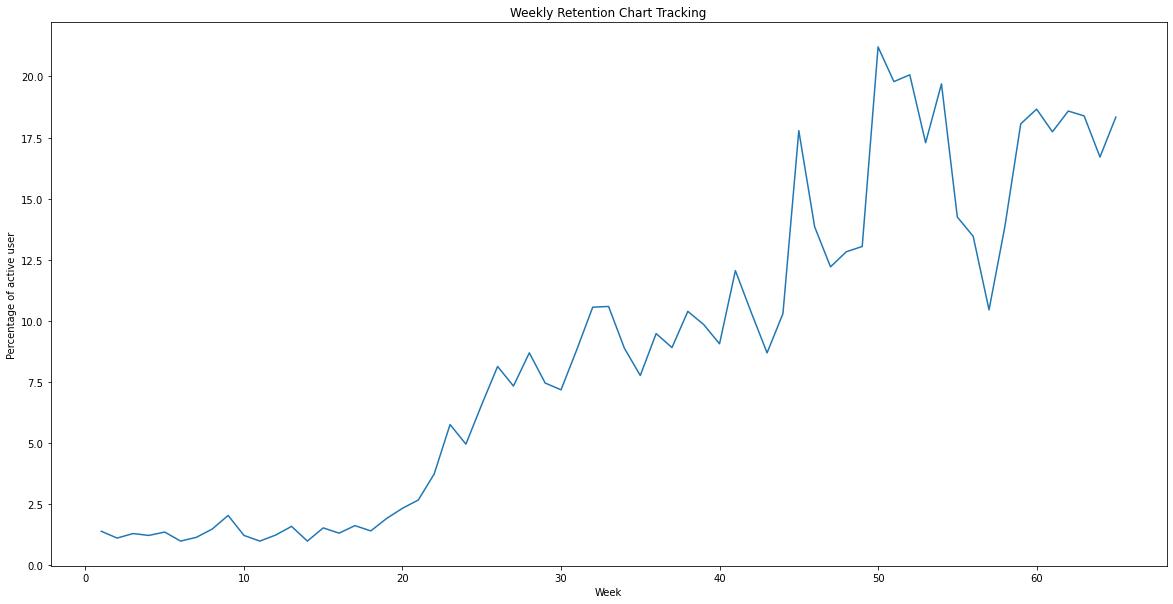

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(retention_tracking['week'],retention_tracking['percent'])
plt.title('Weekly Retention Chart Tracking')
plt.xlabel('Week')
plt.ylabel('Percentage of active user')
plt.show()

# Analyze and comment

I will analyze by each batch of rank name: Standard, Silver, Gold, and Diamond (taking at the end of March 2023)

In [ ]:
standard=end_of_march.loc[end_of_march['Rank Name']=='STANDARD','User_id'].unique()

In [ ]:
silver=end_of_march.loc[end_of_march['Rank Name']=='SILVER','User_id'].unique()

In [ ]:
gold=end_of_march.loc[end_of_march['Rank Name']=='GOLD','User_id'].unique()

In [ ]:
diamond=end_of_march.loc[end_of_march['Rank Name']=='DIAMOND','User_id'].unique()

In [ ]:
batch_standard=Loyal_Ranking.loc[Loyal_Ranking['User_id'].isin(standard[:5]),['DATE','User_id','calculated_point']]
batch_standard=batch_standard.groupby(['DATE','User_id'],as_index=False)['calculated_point'].sum()
batch_standard['Rank name']=batch_standard.apply(rank,axis=1)
batch_standard['Rank name']=batch_standard['Rank name'].fillna('INACTIVE')
mapping={"INACTIVE":0,"STANDARD":1,"SILVER":2,"GOLD":3,"DIAMOND":4}
batch_standard['Class ID']= batch_standard['Rank name'].map(mapping)


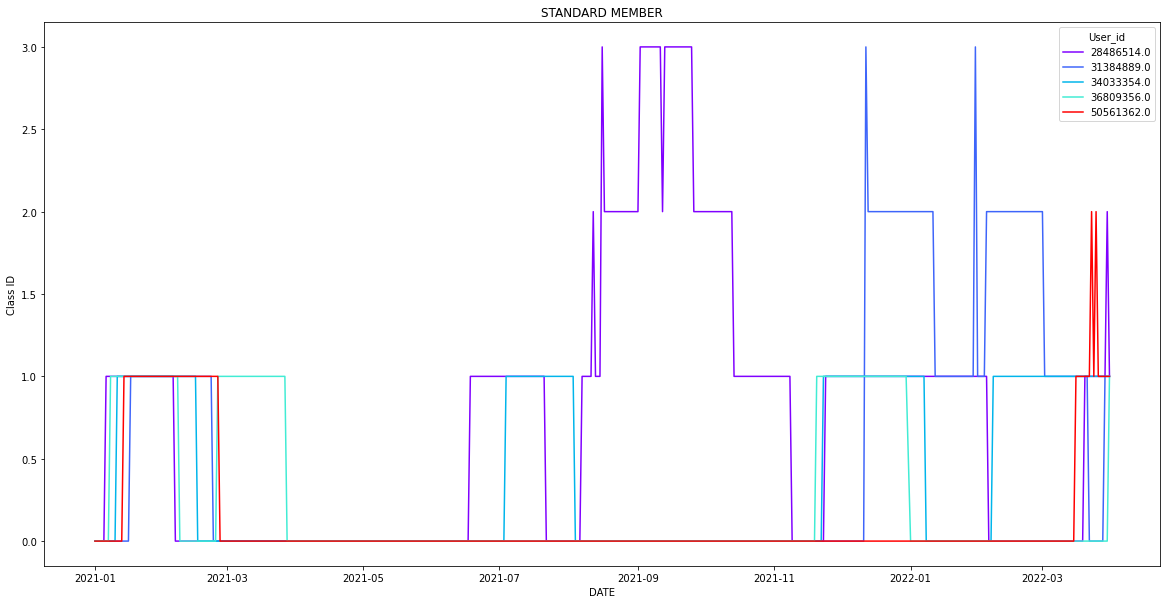

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x='DATE',y='Class ID',hue='User_id',data=batch_standard,palette="rainbow")
plt.title("STANDARD MEMBER")
plt.show()

In [ ]:
batch_silver=Loyal_Ranking.loc[Loyal_Ranking['User_id'].isin(silver[:5]),['DATE','User_id','calculated_point']]
batch_silver=batch_silver.groupby(['DATE','User_id'],as_index=False)['calculated_point'].sum()
batch_silver['Rank name']=batch_silver.apply(rank,axis=1)
batch_silver['Rank name']=batch_silver['Rank name'].fillna('INACTIVE')
mapping={"INACTIVE":0,"STANDARD":1,"SILVER":2,"GOLD":3,"DIAMOND":4}
batch_silver['Class ID']= batch_silver['Rank name'].map(mapping)

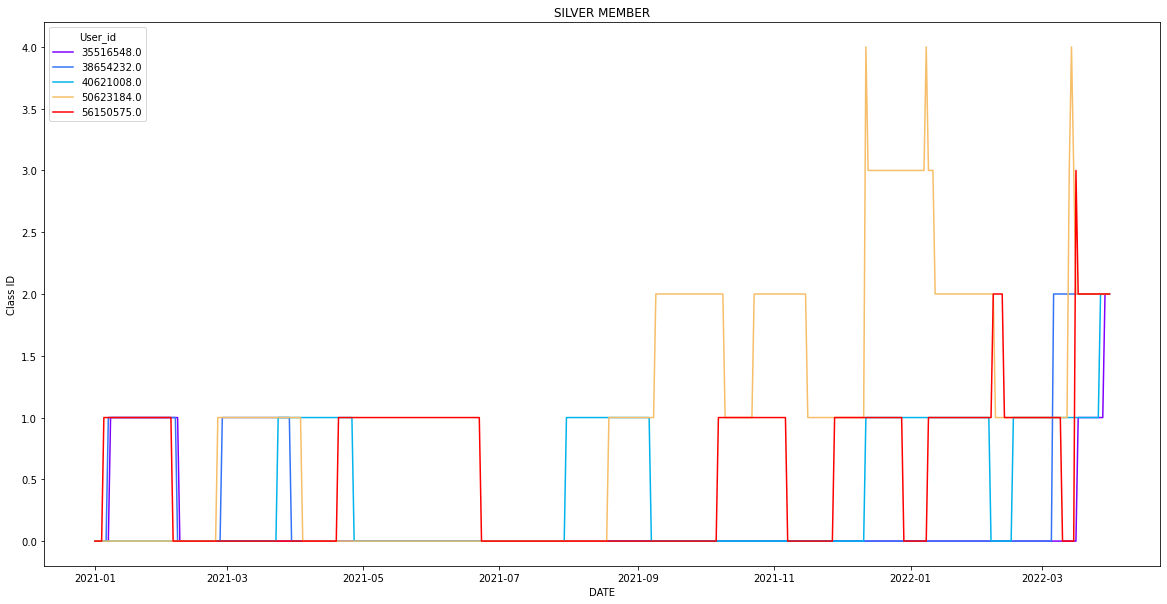

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x='DATE',y='Class ID',hue='User_id',data=batch_silver,palette="rainbow")
plt.title("SILVER MEMBER")
plt.show()

In [ ]:
batch_gold=Loyal_Ranking.loc[Loyal_Ranking['User_id'].isin(gold[:5]),['DATE','User_id','calculated_point']]
batch_gold=batch_gold.groupby(['DATE','User_id'],as_index=False)['calculated_point'].sum()
batch_gold['Rank name']=batch_gold.apply(rank,axis=1)
batch_gold['Rank name']=batch_gold['Rank name'].fillna('INACTIVE')
mapping={"INACTIVE":0,"STANDARD":1,"SILVER":2,"GOLD":3,"DIAMOND":4}
batch_gold['Class ID']= batch_gold['Rank name'].map(mapping)

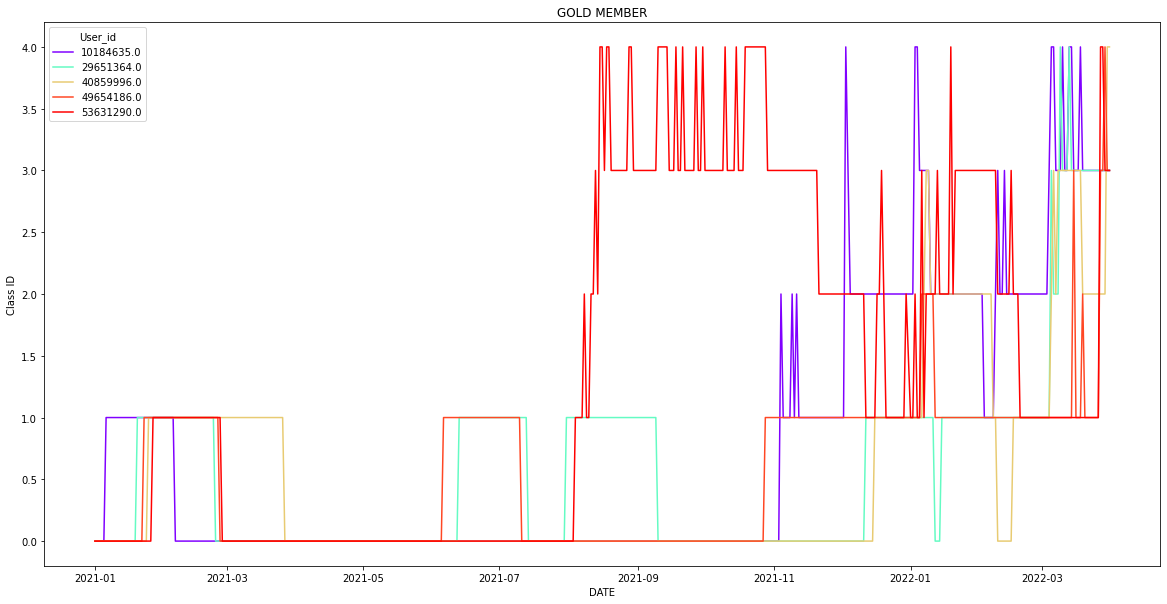

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x='DATE',y='Class ID',hue='User_id',data=batch_gold,palette="rainbow")
plt.title("GOLD MEMBER")
plt.show()

In [ ]:
batch_diamond=Loyal_Ranking.loc[Loyal_Ranking['User_id'].isin(diamond[:5]),['DATE','User_id','calculated_point']]
batch_diamond=batch_diamond.groupby(['DATE','User_id'],as_index=False)['calculated_point'].sum()
batch_diamond['Rank name']=batch_diamond.apply(rank,axis=1)
batch_diamond['Rank name']=batch_diamond['Rank name'].fillna('INACTIVE')
mapping={"INACTIVE":0,"STANDARD":1,"SILVER":2,"GOLD":3,"DIAMOND":4}
batch_diamond['Class ID']= batch_diamond['Rank name'].map(mapping)

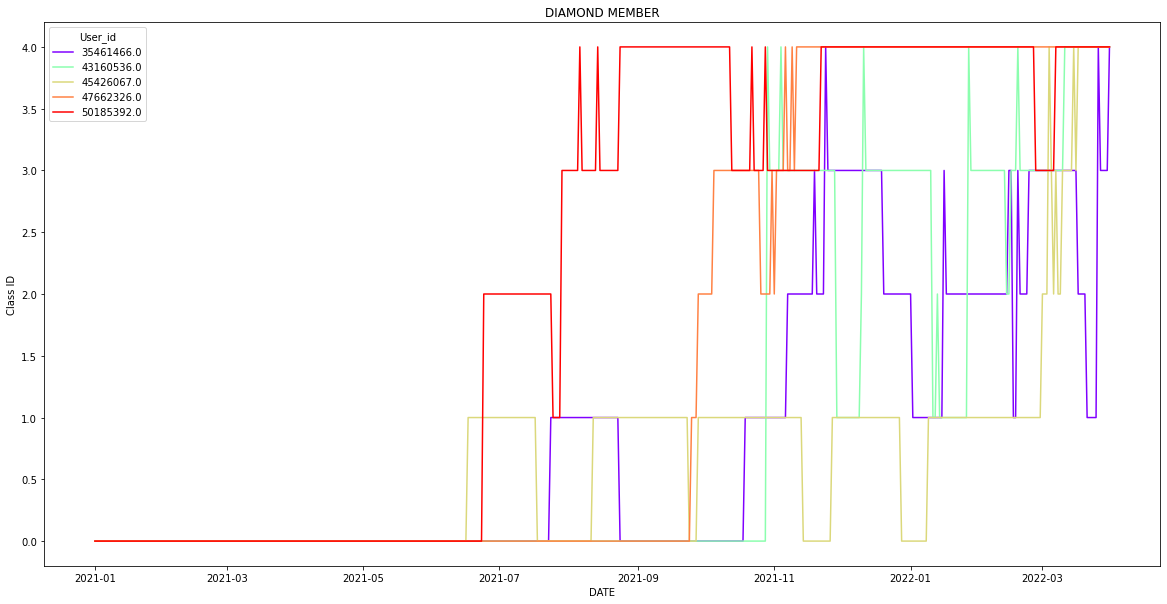

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x='DATE',y='Class ID',hue='User_id',data=batch_diamond,palette="rainbow")
plt.title("DIAMOND MEMBER")
plt.show()

From those 4 graphs, we can gain some conclusions:
 > - Class ID of **2 (Silver) is a critical class** which will determine whether the customer will maintain and push for higher class.
 
 > - As the customers reach the high class (Gold and Diamond), where they have lots of benefit, they tend to **maintain their class(retention)**.(up-down is maintained around class ID of 3 and 4 once they reach there).
 
 > - On the other hand, customers who have **class of 1(Standard)** seem do not care a lot about the **Loyalty program** and just purchase when needed. (lots of unpredictable up-down pattern on Standard and Silver Batch).
 
 > - The strategy that marketing team can take is: **strongly focus pushing marketing ads and promotion to stimulate the power of buying when customers reach Class ID of 2(Silver)**.


In [ ]:
Loyal_Ranking.head()

,DATE,User_id,Service Group,GMV,Loyalty Points,cum_sum,calculated_point,Rank Name
0,2021-01-01,61386143.0,marketplace,100000.0,100.0,100.0,100.0,STANDARD
1,2021-01-02,61386143.0,NaN,0.0,0.0,100.0,100.0,STANDARD
2,2021-01-03,61386143.0,data,10000.0,100.0,200.0,200.0,STANDARD
3,2021-01-04,61386143.0,NaN,0.0,0.0,200.0,200.0,STANDARD
4,2021-01-05,61386143.0,NaN,0.0,0.0,200.0,200.0,STANDARD


In [ ]:
trans= Loyal_Ranking.loc[Loyal_Ranking['GMV']!=0,:]
trans['Class ID']= trans['Rank Name'].map(equiv)
trans=trans.loc[trans['Class ID']>1,:]
#benefit for SILVER or more only
trans=pd.merge(trans,benefit,how='left',on=['Service Group','Class ID'])
trans.head()

/var/folders/mt/pl4zs_qn1px061cxgp0z1h9r0000gn/T/ipykernel_14667/839989319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans['Class ID']= trans['Rank Name'].map(equiv)


,DATE,User_id,Service Group,GMV,Loyalty Points,cum_sum,calculated_point,Rank Name,Class ID,%cashback
0,2021-12-23,36415344.0,marketplace,360000.0,360.000,2725.770,1026.000,SILVER,2.0,NaN
1,2021-06-30,61267321.0,marketplace,607262.0,500.000,1950.000,1450.000,SILVER,2.0,NaN
2,2021-06-30,61267321.0,supermarket,300000.0,300.000,2250.000,1750.000,SILVER,2.0,NaN
3,2021-07-15,61267321.0,marketplace,296215.0,296.215,2546.215,2046.215,GOLD,3.0,2.0
4,2021-07-17,61267321.0,marketplace,473361.0,473.361,3019.576,2519.576,GOLD,3.0,2.0


In [ ]:
trans['%cashback']=trans['%cashback'].fillna(0)
trans['cashback']=trans['GMV']*trans['%cashback']/100
trans['real_cashback']=trans['cashback'].apply(lambda x: x if x<10000 else 10000)

In [ ]:
trans.head()

,DATE,User_id,Service Group,GMV,Loyalty Points,cum_sum,calculated_point,Rank Name,Class ID,%cashback,cashback,real_cashback
0,2021-12-23,36415344.0,marketplace,360000.0,360.000,2725.770,1026.000,SILVER,2.0,0.0,0.00,0.00
1,2021-06-30,61267321.0,marketplace,607262.0,500.000,1950.000,1450.000,SILVER,2.0,0.0,0.00,0.00
2,2021-06-30,61267321.0,supermarket,300000.0,300.000,2250.000,1750.000,SILVER,2.0,0.0,0.00,0.00
3,2021-07-15,61267321.0,marketplace,296215.0,296.215,2546.215,2046.215,GOLD,3.0,2.0,5924.30,5924.30
4,2021-07-17,61267321.0,marketplace,473361.0,473.361,3019.576,2519.576,GOLD,3.0,2.0,9467.22,9467.22


In [ ]:
cashback=trans.groupby(['Rank Name','Service Group'],as_index=False)[['GMV','real_cashback']].sum()
cashback

,Rank Name,Service Group,GMV,real_cashback
0,DIAMOND,Coffee chains and Milk tea,7342773.0,0.00
1,DIAMOND,cvs,193049843.0,3994019.52
2,DIAMOND,data,10720000.0,1111640.00
3,DIAMOND,marketplace,618297838.0,11281258.60
4,DIAMOND,supermarket,138445481.0,3366798.90
5,GOLD,Coffee chains and Milk tea,19056083.0,0.00
6,GOLD,cvs,398636435.0,6358403.51
7,GOLD,data,53224500.0,3663715.00
8,GOLD,marketplace,661110916.0,10007725.02
9,GOLD,supermarket,201414648.0,3074623.96


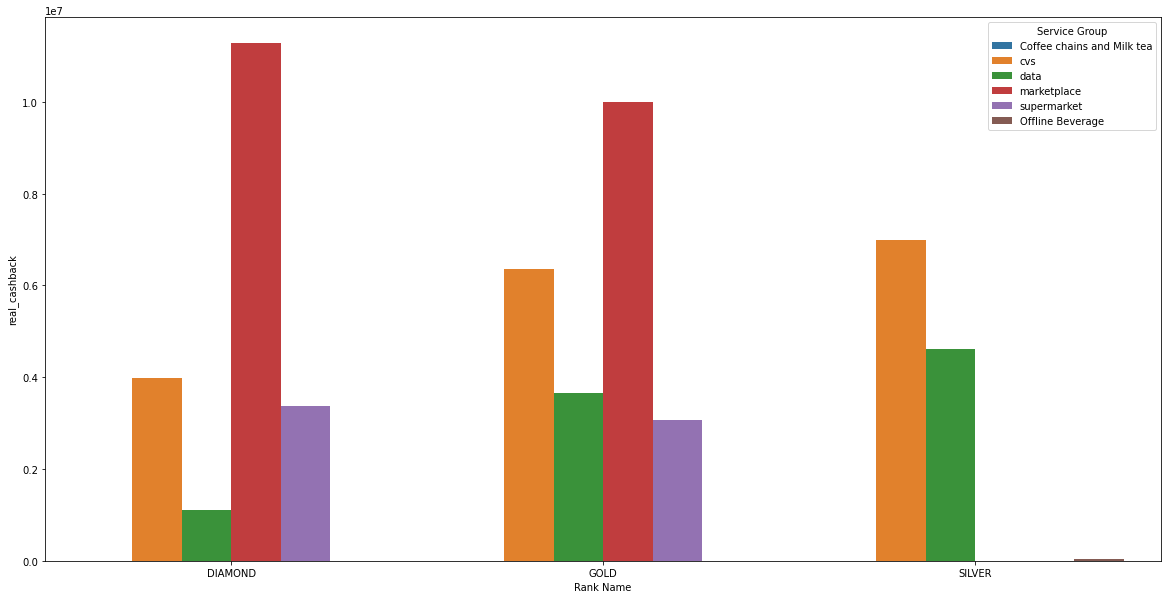

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Rank Name',y='real_cashback',hue='Service Group',data=cashback)
plt.show()

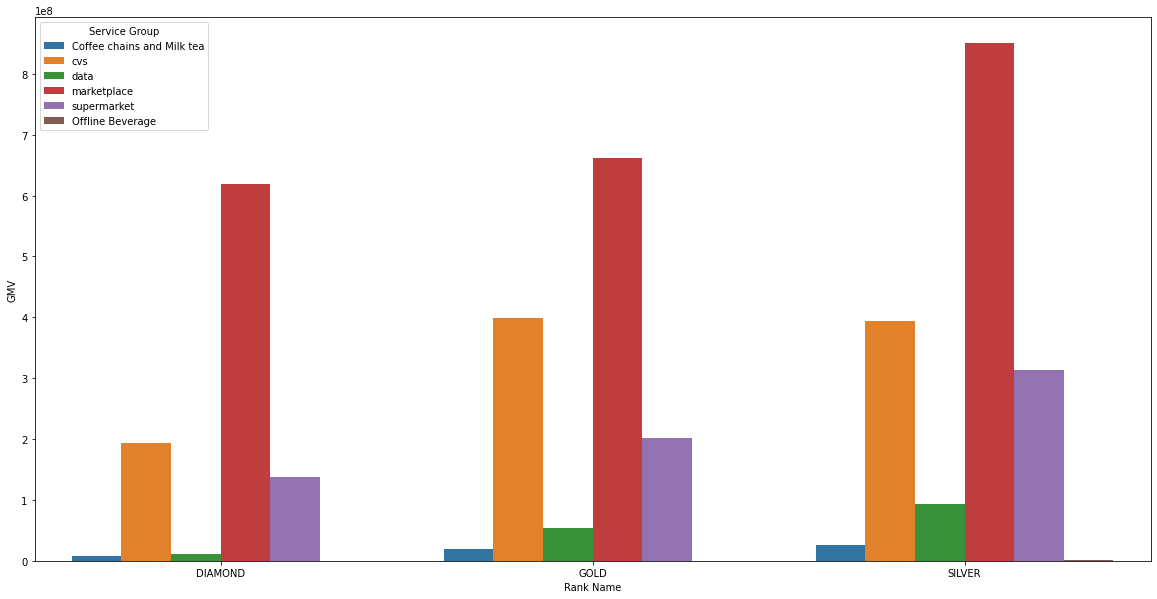

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Rank Name',y='GMV',hue='Service Group',data=cashback)
plt.show()

As we can see in two visualizations:

> - No matter what rank of loyalty, customers spend most of their money on **marketplace and supermarket**. Hence, decreasing the **cash back percent** will be a strategy.

> - On the other hand, **coffee chains and Milk tea** is a potential segment when going out for milk tea or coffee is a popular habit of people. Therefore, adding more **benefit of cash back** for this segment for all of rank will **maintain retention of customers**.

# Extended question:

What ideas do you have for Momo in loyalty program development strategy?

> - Charity services: the program which customers can exchange their **loyalty points** to contribute meaningful charity programs such as "Trường Học cho trẻ em vùng cao","Ủng hộ đồng bào lũ lụt". Our target customer will be who love giving back to community and stimulates their power of buying when they can giving back when shopping at the same time.

> - Special Events Giving: Throughout a year, on the special days, such as Momo's Birthday, there will be **big give away** (traveling tour, electronics devices, phones, tablets,etc) where the higher rank of customers the more entry tickets they will have to enter the events.

Gamification is usually a sensible option for apps to raise users’ stickiness. In our loyalty program development strategy, we also plan to hold a small game for users. The rule is simple: any users who can maintain a 20-day or longer streak of being in the DIAMOND ranking is a winner (in other words, winners are users who have total loyalty points greater than or equal to 5,000 for at least 20 consecutive days). We also want to give a special reward for the user(s) who can maintain the longest streak. Could you help us to calculate how many winners were there during the last thirty days in the given data (March 01 - March 31) and who was/were the one(s) boasting the longest streak during that time?										

In [ ]:
march_record=Loyal_Ranking[(Loyal_Ranking['DATE']<='2022-03-31')&(Loyal_Ranking['DATE']>='2022-03-01')]

In [ ]:
diamond_march=march_record[march_record['Rank Name']=='DIAMOND']
diamond_march['User_id'].nunique()

23

In [ ]:
streak={}
count=0
for i in (diamond_march['User_id'].unique()):
    record=diamond_march[diamond_march['User_id']==i]
    day=(record['DATE'].max()-record['DATE'].min()).days
    if day>=20: count+=1
    streak[i]=day

In [ ]:
streak

{39619396.0: 7,
 44119627.0: 1,
 45426067.0: 13,
 25993024.0: 7,
 50185392.0: 24,
 31244414.0: 1,
 12229364.0: 10,
 35461466.0: 0,
 47662326.0: 30,
 39956101.0: 8,
 43160536.0: 20,
 39314846.0: 30,
 55443594.0: 7,
 44850195.0: 2,
 55200938.0: 30,
 43933779.0: 9,
 57207697.0: 30,
 54960619.0: 11,
 44901759.0: 7,
 51432947.0: 27,
 36884902.0: 20,
 54788782.0: 1,
 49689927.0: 14}

In [ ]:
print(f'There were {count} winners during the last thirty days in the given data')

There were 8 winners during the last thirty days in the given data


In [ ]:
 print('47662326, 39314846, 57207697 are the one(s) boasting the longest streak during that time with 30 days')

47662326, 39314846, 57207697 are the one(s) boasting the longest streak during that time with 30 days


# Conclusion:

> - There are total **124** users achieved **GOLD** at the end of March 2022
> - Total cashback on Feb 2022 is **4350391**
> - Class ID of **2 (Silver) is a critical class** which will determine whether the customer will maintain and push for higher class.
> - As the customers reach the high class (Gold and Diamond), where they have lots of benefit, they tend to **maintain their class(retention)**.(up-down is maintained around class ID of 3 and 4 once they reach there).
> - On the other hand, customers who have **class of 1(Standard)** seem do not care a lot about the **Loyalty program** and just purchase when needed. (lots of unpredictable up-down pattern on Standard and Silver Batch).
> - The strategy that marketing team can take is: **strongly focus pushing marketing ads and promotion to stimulate the power of buying when customers reach Class ID of 2(Silver)**.
> - No matter what rank of loyalty, customers spend most of their money on **marketplace and supermarket**. Hence, decreasing the **cash back percent** will be a strategy.
> - On the other hand, **coffee chains and Milk tea** is a potential segment when going out for milk tea or coffee is a popular habit of people. Therefore, adding more **benefit of cash back** for this segment for all of rank will **maintain retention of customers**.

Development strategies:

> - Charity services: the program which customers can exchange their **loyalty points** to contribute meaningful charity programs such as "Trường Học cho trẻ em vùng cao","Ủng hộ đồng bào lũ lụt". Our target customer will be who love giving back to community and stimulates their power of buying when they can giving back when shopping at the same time.
> - Special Events Giving: Throughout a year, on the special days, such as Momo's Birthday, there will be **big give away** (traveling tour, electronics devices, phones, tablets,etc) where the higher rank of customers the more entry tickets they will have to enter the events.

> - There were 8 winners during the last thirty days in the given data (hold the DIAMOND at least 20 days)
> - 47662326, 39314846, 57207697 are the one(s) boasting the longest streak during that time with 30 days
